## Background / Motivation

We are all big football fans and wanted to gain a deeper understanding of the offensive side of the game. In particular, we seeked to explore how external factors (outside of player performance) contribute to offensive performance.  We hope to use these insights to improve our chances of success in fantasy football and football betting. Additionally, there has been a recent outrage by players against turf fields due to them causing more non contact leg injuries, so we wanted to see if there was an advantage to players by playing on turf that would cause the teams to use it.


## Problem statement 


We are interested in how external circumstances affect individual/team offensive performance in NFL games, we seek to answer the 4 following questions: 
1. Does playing home vs away have an association on offensive performance in NFL games
2. Do weather conditions have an association with offensive performance in NFL games? 
3. Is there an association between the field surface and offensive performance?
4. How accurate are Vegas sportsbooks at predicting the score of games? 


## Data sources

We used nfl offensive data from kaggle: https://www.kaggle.com/datasets/dtrade84/nfl-offensive-stats-2019-2022/data

The data has the offensive stats for each player in each game as well as the score of the game and a variety of information about the stadium environment

The data has 19,973 rows and 69 columns

## Stakeholders

There are a wide variety of potential stakeholders: <br> <br>
Sports Gamblers: They can use the trends we present to find bets that have a higher probability of winning <br>
Fantasy Football Players: Can use the data to choose players to draft, start/sit, or trade for <br>
Team Owners/Stadium Designers: Can use the data to design a stadium that minimizes injury and maximizes offensive performance

## Data quality check / cleaning / preparation 

In [12]:
#|echo: false
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('nfl_offensive_stats.csv')

### Categorical Data

##### game_id
Each game in the dataset has its own game_id, rows with the same game_id represent the same game

In [13]:
#|echo: false
print('Number of unique values:', data.game_id.nunique())
print('Number of missing values:', data.game_id.isnull().sum())
data.game_id.value_counts()[:4]

Number of unique values: 820
Number of missing values: 0


202010110sfo    29
202010180pit    29
202010180tam    29
202111140rai    29
Name: game_id, dtype: int64

##### team
Indicates the team of the player

In [14]:
#|echo: false
print('Number of unique values:', data.team.nunique())
print('Number of missing values:', data.team.isnull().sum())
data.team.value_counts()[:4]

Number of unique values: 32
Number of missing values: 0


KAN    743
TEN    693
GNB    690
TAM    687
Name: team, dtype: int64

##### position
Indicates the position of the player

In [15]:
#|echo: false
print('Number of unique values:', data['position '].nunique())
print('Number of missing values:', data['position '].isnull().sum())
data['position '].value_counts()[0:4]

Number of unique values: 28
Number of missing values: 0


WR    7904
TE    4711
RB    4447
QB    1994
Name: position , dtype: int64

##### home_team
indicates the home team for the game of that row's game_id

In [16]:
#|echo: false
print('Number of unique values:', data.home_team.nunique())
print('Number of missing values:', data.home_team.isnull().sum())
data.home_team.value_counts()[0:4]

Number of unique values: 32
Number of missing values: 0


KAN    823
GNB    686
NOR    678
TEN    671
Name: home_team, dtype: int64

##### vis_team
indicates the away team for the game of that row's game_id

In [17]:
#|echo: false
print('Number of unique values:', data.vis_team.nunique())
print('Number of missing values:', data.vis_team.isnull().sum())
data.vis_team.value_counts()[0:4]

Number of unique values: 32
Number of missing values: 0


TAM    709
SFO    679
TEN    663
BUF    660
Name: vis_team, dtype: int64

##### Surface
Indicates the field surface for the row's game_id

In [18]:
#|echo: false
print('Number of unique values:', data.Surface.nunique())
print('Number of missing values:', data.Surface.isnull().sum())
data.Surface.value_counts()

Number of unique values: 8
Number of missing values: 0


grass         9002
grass         3130
fieldturf     2260
fieldturf     2144
astroturf     1360
matrixturf    1082
sportturf      753
a_turf         242
Name: Surface, dtype: int64

##### Vegas_Favorite
Indicates the team that sportsbooks projected to win the game

In [19]:
#|echo: false
print('Number of unique values:', data.Vegas_Favorite.nunique())
print('Number of missing values:', data.Vegas_Favorite.isnull().sum())
print(pd.concat([data.Vegas_Favorite.value_counts()[:4],data.Vegas_Favorite.value_counts()[32:33]]))

Number of unique values: 33
Number of missing values: 46
KAN                    1318
GNB                    1040
TAM                    1002
LAR                     974
ERROR - abbrev_team      70
Name: Vegas_Favorite, dtype: int64


### Continuous Data

##### home_score
Indicates the score of the home team for the given game

##### vis_score
Indicates the score of the away team for the given game

##### Total_SDP
A comprehensive metric used to compute a player's offensive impact

##### Off_SDP
A comprehensive metric used to compute a player's offensive impact. The difference from Total_SDP is that return touchdowns are not taken into account in Off_SDP

##### pass_yds
Indicates the passing yards for the given player

##### rush_yds
Indicates the rushing yards for the given player

##### rec_yds
Indicates the receiving yards for the given player

##### Vegas_Line
The absolute value of Vegas_Line indicates how many points the Vegas_Favorite team is supposed to win by

In [20]:
#|echo: false
print('Number of Missing Values:',data.loc[:,['home_score','vis_score','Total_SDP','Off_SDP','pass_yds','rush_yds','rec_yds','Vegas_Line']].isnull().sum())
data.loc[:,['home_score','vis_score','Total_SDP','Off_SDP','pass_yds','rush_yds','rec_yds','Vegas_Line']].describe()

Number of Missing Values: home_score    0
vis_score     0
Total_SDP     0
Off_SDP       0
pass_yds      0
rush_yds      0
rec_yds       0
Vegas_Line    0
dtype: int64


,home_score,vis_score,Total_SDP,Off_SDP,pass_yds,rush_yds,rec_yds,Vegas_Line
count,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000
mean,23.912382,23.221149,6.562219,6.554709,20.565513,9.488810,20.565513,-5.704251
std,10.184923,10.265776,7.910335,7.907271,70.841227,23.215203,30.149293,3.706104
min,0.000000,0.000000,-3.740000,-3.740000,-2.000000,-28.000000,-11.000000,-22.000000
25%,17.000000,16.000000,0.100000,0.100000,0.000000,0.000000,0.000000,-7.500000
50%,24.000000,23.000000,3.500000,3.440000,0.000000,0.000000,7.000000,-4.500000
75%,31.000000,30.000000,10.100000,10.100000,0.000000,5.000000,31.000000,-3.000000
max,56.000000,59.000000,56.700000,56.700000,525.000000,253.000000,269.000000,0.000000


### Data Cleaning

The ‘position’ column header has an extra space at the end, so we changed the name to remove the space. In the ‘Surface’ column, there were two distinct values for ‘grass’ and ‘fieldturf’ as shown in the table above. We ran a lambda function so that there was only one unique value for ‘grass’ and ‘fieldturf. Also, for all the missing values in Vegas_Favorite, neither team was projected to win (i.e. the Vegas Line was 0), so we changed the values from null values to 'none'. Also, there were certain games in which the Vegas Favorite is listed as 'ERROR - abbrev_team' as shown in the table above, so we filtered to find which games were missing and then googled the game to find which team was the favorite and manually overrode these individual vegas_favorites.

In [21]:
#|echo: false
data.rename(columns={'position ':'position'},inplace=True)
data.Surface=data.Surface.apply(lambda x: 'fieldturf' if 'fieldturf' in x else 'grass' if 'grass' in x else x)
data.loc[data[data.Vegas_Favorite.isnull()].index,'Vegas_Favorite']='None'
data.loc[data.game_id=='202012020pit','Vegas_Favorite'] = 'PIT'
data.loc[data.game_id=='202012070pit','Vegas_Favorite'] = 'PIT'
data.loc[data.game_id=='202012080rav','Vegas_Favorite'] = 'BAL'

### Data Preparation

We made a new column score which is the score of the team that each player is on in a given game. We made a new column called score_diff which is the difference of the score of a player's team - the score of the team they're playing against. We also changed the vegas line for the not favorited teams (i.e. if a team is projected to lose by 5 points, their Vegas_Line would be +5). We also added the column 'favorite' which is a yes if the team a player was on was projected by vegas to win the game, a no if the team was projected to lose, and push if the team was projected to tie. We also defined a column called 'win' which is 'win' if the team that a player is on wins a specific game, 'tie' if the team ties, and 'loss' if the team loses. We also defied a column called 'covered' that is a 'yes' if the team that a player plays on covers the spread (i.e. if a team's vegas_line is -3.5, then the team must win by more than 3.5 points to cover the spread and if a team's vegas line is +7, then the team must lose by less than 7 or win to cover the spread), a 'push' if the team tie's the vegas_line prediction (i.e. a team with vegas_line +4 loses by exactly 4 points), and a 'no' if the team fails to cover or push. We made two columns to represent total yards for position groups. The Rushing+Passing column sums pass_yds and rush_yds and will be used to represent the total yards per game for an entire team and for quarterbacks. The Rushing+Receiving column sums rush_yds and receiving yards and will be used to represent total yards per game for runningbacks, wide receivers and tight ends. We created a column 'home_or_away' to indicate whether the player in the observation is playing away or home. Lastly, we created a column 'h-a_score' to represent the difference in the score between the home team and the away team. 

In [22]:
#|echo: false
data['score']=data.apply(lambda x: x.home_score if x.team==x.home_team else x.vis_score,axis=1)
data['score_diff']=data.apply(lambda x: x.home_score-x.vis_score if x.team==x.home_team else x.vis_score-x.home_score,axis=1)
data['Vegas_Line']=data.apply(lambda x:x.Vegas_Line if x.Vegas_Favorite==x.team else -x.Vegas_Line,axis=1)
data['favorite']=data.apply(lambda x: 'yes' if x.Vegas_Line < 0 else 'push' if x.Vegas_Line==0 else 'no',axis=1)
data['win'] = data.apply(lambda x: 'win' if x.score_diff>0 else 'tie' if x.score_diff==0 else 'loss',axis=1)
data['covered'] = data.apply(lambda x:'yes' if x.Vegas_Line+x.score_diff>0 else 'push' if x.Vegas_Line + x.score_diff==0 else 'no',axis=1)
data['Rushing+Passing']=data.pass_yds+data.rush_yds
data['Rushing+Receiving']=data.rush_yds+data.rec_yds
data['player_is_home'] = data['home_team'] == data['team']
data['home_or_away'] = data['player_is_home'].apply(lambda x: 'home' if x==True else 'away')
data['h-a_score'] = data['home_score']-data['vis_score']     

## Exploratory Data Analysis

### Analysis 1
By Vincent Chen

**QUESTION**: Does playing home vs away have an association on how well individual players, as well as teams, perform in NFL games? 

In the NFL, it is often said that teams have home advantage, that is, teams tend to perform better at home than away. While most tend to accept this theory, one raises questions about the validity of the theory, as well as the applications of the theory. A deeper understanding of the home team advantage would give insights to managers in developing strategies for home vs. away games, and is crucial for sports bettors who are always seeking for a better prediction on game outcomes. To answer this question, I approached this question from two angles: by individual performance and by team performance. Lastly, I also explored whether playing home or away affects teams differently. 

**INDIVIDUAL PERFORMANCE**: To explore the association between home and away with individual player performance, I examined the difference between home vs away offensive performance. As offensive fantasy points are a common and strong way of measuring offensive performance, I used offensive fantasy points to measure the offensive performance. Since I noticed that whether a player is home or away could affect players differently by position, I decided to also divide the players by position.I then created a barplot that shows how the offensive fantasy points changes based on whether players are playing home or away, by the main position. 

**(Refer to figure 1.1)**
As we can see, while playing at home does, on average, give a slight edge to players for all positions, the impact is minimal for all positions. As such, the home-field advantage barely applies to individual player performance, which is an important result that NFL viewers and managers should note. 


**TEAM PERFORMANCE**: Although home advantage barely plays a role in individual performance, could we say the same for team performance? To explore the association between playing home or away on team performance, I grouped the data by game and whether the team is home or away, and I examined the percentage of wins of home teams vs away teams, noting that 51% of the time, the home team wins, and 49% of the time, the away team wins. **(Refer to figure 1.2)** 

While the win rate seems to vary very insignificantly by home or away team, I thought that a plot of the distribution of the score difference between home teams and away teams would reveal more details. While we know that home teams only win more frequently by a small percentage, we do not know the specific details about the scores in these games. As such, I plotted the following distribution graph. 

**(Refer to figure 1.3)** 
The figure represents the number of games for every score difference between the home and away team (home score - away score). Positive values of the x axis represents games where the home team scores more than the away team, and vice versa. As seen in the above distribution graph, while large wins are more likely for home teams than for away teams, home teams also have a higher chance of losing by a small margin than winning by a small margin. Specifically, home teams have a 22% higher chance of winning by more than 10 points than away teams do, but away teams have a 9.3% higher chance of winning by less than 10 points than home teams do. This data suggests that home teams tend to be more aggressive in their play style, attempting for wins with higher scores, but that does not necessarily increase their win rates, because they are still highly susceptible to losing by a small margin, even more so than the away teams. 

While the fact that home teams tend to win by higher scores than away teams are doesn't surprise me, what does surprise me is that home teams have a higher chance of losing by a small margin than away teams. To explore the reasons behind this, I looked into the specific offensive statistics of games where home teams lose by small margins. I discovered that while passing statistics are basically the same for both teams, the home team tends to make more mistakes: fumbling more (62% more than the away team), getting sacked more (37% more), throwing more interceptions, making more poor throws, and dropping more balls. Additionally, the away team rushes on average 20 more yards per game than the home team, which is significant considering the win by only a slight margin. As such, we can conclude that home teams are more likely to actually make mistakes and underperform in rush than away teams are, in games where the home team is losing by a small margin. 

**IMPACT VARIATIONS BY TEAM**: Lastly, I examined whether playing home or away impacted different teams differently. That is, while one team may benefit from playing home, another team may not see much benefit at all. Refer to the following graph. 

**(Refer to figure 1.4)** 
The y axis represents the average extra net points a team gains from playing home over playing away. Extra net points is equivalent to extra points gained from playing home - extra points conceded from playing home, which measures how much better a team performs at home than away. I chose to use extra net points over points, because the sole measure of points doesn't account for how many points the opposing team scores, while extra net points accounts for the opposing team's score, thus giving us a more accurate measure into how much better a team actually performs at home. On average, playing home gives teams an extra 1.32 points (not shown). However, the advantage varies significantly by team as we can see by the graph, with a standard deviation of nearly 3.5 points (not shown). The Arizona Cardinals, New Orleans Saints are teams that perform significantly worse at home than away. In particular, the Arizona Cardinals perform 6 points worse at home than away. The Green Bay Packers, New York Jets, and Pittsburgh Steelers are teams that perform significantly better at home than away. In particular, the Green Bay Packers perform about 9 points better at home than away. As such, we can conclude that playing home vs playing away has varying impacts based on the individual team. 


Next, I wanted to explore the common characterstics about teams that benefit more from playing home/away. To do this, I looked at the correlation between extra net points and other variables in the dataset. 

**(Refer to figure 1.5)**. An interesting thing to note is, the top 10 most positively correlated variables with extra net points are indicative of poor offensive performance, and the top 10 most negatively correlated variables are indicative of good offensive performance. Therefore, we observe that the teams who benefit the most from playing home tend to have poorer offensive performance than teams that benefit less from playing home, while teams that do not benefit tend to have better offensive performance. 

**CONCLUSIONS/RECOMMENDATIONS:**

Based on this analysis, we can conclude a few things: Firstly, whether a player plays home or away has minimal impact on the indivdual player's offensive performance, regardless of position. 

Secondly, while home teams do not have an edge in their win rates against away teams, home teams are more likely to win by a large margin than away teams are, indicative of more offensive aggression. However, home teams are also more likely to lose by a small margin than they are to win by a small margin. These games are characterized by player mistakes/fumbles, and poor rush performance, while it has very little to do with passing performance. As such, I recommend that in home games where the home team is losing by a small margin, NFL coaches should focus on making players more composed and improving rushing, instead of improving passing. In away games, NFL coaches should try to induce mistakes on the home team. At the same time, away coaches should understand that home teams could play more aggressively on offense and thus, should prepare for stronger defenses while playing away. 

Lastly, the impact of playing home vs. away on team performance varies significantly by team. For sports bettors, I recommend the following: The Arizona Cardinals, New Orleans Saints are teams that peform significantly worse at home than away. Thus when betting on these teams, lean towards betting a lost for these teams when they are playing home. The Green Bay Packers, New York Jets, and Pittsburgh Steelers are teams that perform significantly better at home than away. When betting for these teams,lean towards betting a win for these teams when they are playing home. In general, teams that benefit more from playing home over away tend to be teams that are performing better. Thus, in general, sports bettors should expect home and away performance to be roughly the same for teams that are performing well, while more varied difference for teams that are not performing so well. 

### Analysis 2
By Will Krew

**QUESTION:** In this section, we will be analyzing the following question: what impact do various weather conditions have on NFL offensive performance? 

Despite professional football players’ efforts to adapt to unique situations, constant travelling and new game environments may pose challenges for players. Specifically, suboptimal weather conditions may have negative impacts on NFL performance. Thus, this section seeks to answer how weather influences player and team performance, as well as what weather conditions we can consider ‘suboptimal’ for NFL games, in addition to how we can quantify impacts on player and positional performance. 

Likewise, NFL owners and fantasy football managers must make decisive decisions on a game by game basis, as they must keenly follow minute changes to any variables that may affect the performance of players on any given day. Specifically, as weather conditions vary daily, and even throughout the day, these managerial positions must capitalize on suboptimal (and optimal) weather conditions, so that they can make strategy and player changes to maximize their team’s chances of winning games. Therefore, examining weather statistics and offensive output can provide NFL owners and fantasy managers strategies to employ. 

We will examine the impact of three weather variables: temperature, wind speed, and humidity. 

**OVERALL OFFENSIVE PERFORMANCE:** First, we will discuss which weather conditions are most conducive for optimal offensive performance. Specifically, we will define which weather conditions are ‘suboptimal’ based on diminishing offensive performance. To evaluate this, we will examine NFL team scores across games as humidity, temperature, and wind speed vary. As the primary goal of NFL owners is to win as many NFL games, owners want to maximize the number of points their team scores. Thus, we will examine the changes in overall offensive output through team scores.

For each weather variable (humidity, temperature, and wind speed), I grouped them into bins, and displayed the score as a function of the weather variables via a boxplot.

In [23]:
#|echo: false
game_humidity = data.Humidity.groupby(data.game_id).mean() # humidity for each game
binned_game_humidity = pd.cut(game_humidity,bins = 8,retbins=True) # binning humidity for each game

game_wind_speed = data.Wind_Speed.groupby(data.game_id).mean() # wind speed for each game
binned_game_wind_speed = pd.cut(game_wind_speed,bins = [-1,0,5,10,15,20,35],retbins=True) # binning wind speed for each game

game_temps = data.Temperature.groupby(data.game_id).mean() # temperature for each game
binned_game_temp = pd.cut(game_temps,bins = [5,17,29,41,53,65,75,85,95],retbins=True) # binning temperature for each game

game_scores = data.score.groupby(data.game_id).mean() # score of each game

**(Refer to figure 2.1)**

**Humidity:** Looking at the box plot, NFL scores appear to have a negative parabolic relationship with humidity. Specifically, the average is at its maximum around the middle sweet spot of humidity values (from 37.5 to 62.5%), while score decreases when moving closer to the extreme humidity values of 0 and 100%. Ultimately, when compared with the highest average score in the humidity sweet spot, NFL score decreases by 18% when moving to lower humidities, and decreases by 12% for higher humidities.

**Temperature:** Looking at the box plot, NFL scores appear to have a slight upward relationship with temperature. Generally, teams playing in games with temperatures below 53°F score slightly less points when compared with games with temperatures above 53°F. Furthermore, with the standard temperature in indoor stadiums being 72°F (room temperature), scores for games in the below freezing temperature bins are 11% less than the temperature bin containing room temperature.

**Wind Speed:** Looking at the box plot, NFL scores appear to have a consistently downward relationship with wind speed. For each increase in wind speed, score decreases; however the score decrease is much more substantial before wind speed reaches 10 mph, and then the score starts to level off after 10 mph with more slight decreases. When compared with games with zero wind speed (mainly at indoor stadiums), scores decreased by 13% for games with wind speeds greater than 10 mph.

**Defining Suboptimal Conditions:** For each of the weather statistics (humidity, temperature, and wind speed), NFL scores showed a non horizontal relationship with weather, with greater than 10% variation in score for each variable. Thus, for each weather variable, we deem certain ranges as optimal for scoring and certain ranges suboptimal for scoring. When defining suboptimal conditions, we will consider the weather ranges that deviated by about 10% relative to the peak score for each variable.

- Humidity: 0-37.5% and 62.5-100% (Representing 38% of total games (311/820))
- Temperature: Less than 53°F (Representing 27% of total games (222/820))
- Wind Speed: Greater than 10 mph (Representing 22% of total games (179/820))

Furthermore, games are considered more suboptimal as more of the weather variables are suboptimal. The following is the percentage of games where (x) number of weather conditions are suboptimal:
- 0: ~45% (373/820)
- 1: ~28% (227/820)
- 2: ~21% (175/820)
- 3: ~5% (45/820)
- At least 1: ~55% (447/820)

**OFFENSIVE PERFORMANCE BY POSITION:** Next, we will discuss how different weather conditions affect the performance of various offensive positions. In this analysis, I will consider four primary offensive positions: quarterbacks (QB: mainly throw the ball), running backs (RB: mainly run the ball), wide receivers (WR: mainly catch the ball), and tight ends (TE: hybrid position that both catches the ball and blocks), and the effects of humidity, temperature, and wind speed on offensive fantasy points. Specifically, I want to quantify how each position’s output is affected by suboptimal conditions. To measure the offensive output of each position, I will be using data on offensive fantasy points. Offensive fantasy points are a computer calculated statistic that measures nearly every offensive statistic, from total yards thrown and touchdown passes for QBs to total yards carried for RBs. Thus, offensive fantasy points will act as our summary statistic that aims to be directly proportional to a players offensive output.

Once again, for each weather variable (humidity, temperature, and wind speed), I grouped them into bins. For each team and game, I calculated the total offensive fantasy points for each position. Then, I displayed the offensive fantasy points as a function of the weather variables via a boxplot for each of the four positions.


In [24]:
#|echo: false
qb_data = data.loc[data['position']=='QB',:] #creating dataset for just QB data
qb_Off_SDP = qb_data.Off_SDP.groupby(qb_data.game_id).sum() # QB Offensive Fantasy Points for each unique game + team combination

wr_data = data.loc[data['position']=='WR',:] #creating dataset for just WR data
wr_Off_SDP = wr_data.Off_SDP.groupby(wr_data.game_id).sum() # WR Offensive Fantasy Points for each unique game + team combination

rb_data = data.loc[data['position'].isin(['RB','HB']),:] #creating dataset for just RB data
rb_Off_SDP = rb_data.Off_SDP.groupby(rb_data.game_id).sum() # RB Offensive Fantasy Points for each unique game + team combination

te_data = data.loc[data['position']=='TE',:] #creating dataset for just TE data
te_Off_SDP = te_data.Off_SDP.groupby(te_data.game_id).sum() # TE Offensive Fantasy Points for each unique game + team combination

**Humidity: (Refer to figure 2.2)** Looking at the boxplots, QBs and WRs appear to experience the same negative hyperbolic relationship with humidity as seen in the overall trend. Specifically, offensive fantasy points are lower for the suboptimal humidity levels (less than 37.5% and more than 62.5%) when compared with optimal humidity levels. Compared with optimal humidity levels, fantasy points for QBs decrease by 23% for lower humidity levels, while fantasy points for WRs decrease by 15%. Both positions experience similar decreases for higher humidity levels as well. For TEs, they experience a less prominent negative hyperbolic relationship with humidity when compared with QBs and WRs, but nonetheless, offensive fantasy points for TEs are slightly lower for suboptimal humidity levels. On the other hand, RB performance appears to have a horizontal relationship with humidity, not experiencing the same decrease in offensive fantasy points for suboptimal humidity levels like the other positions.

**Temperature: (Refer to figure 2.3)** Looking at the boxplots, QBs, WRs, and TEs appear to have a more prominent increase in offensive fantasy points as temperature increases. Specifically for the three positions, offensive fantasy points are lower for suboptimal temperatures (below 53°F), than for optimal temperatures. Compared with the temperature bin containing room temperature, for games below freezing, both QB and WR fantasy points decrease by 19%, and while TE fantasy points exhibit a slight departure from the overall trend for games slightly below freezing, TE fantasy points nontheless decrease by 27% for temperatures much below freezing. One again, however, RB performance does not change with temperature, as offensive fantasy points remain almost perfectly consistent as temperature increases.

**Wind Speed: (Refer to figure 2.4)** Looking at the boxplots, QBs, WRs, and TEs appear to have a consistent decrease in offensive fantasy points as wind speed increases. For these three positions, offensive fantasy points are lower for suboptimal wind speeds (greater than 10 mph), than for optimal wind speeds. Furthermore, when compared with games with zero wind speed, for games with around 15 mph wind speeds, QB fantasy points decrease by 20%, and WR fantasy points decrease by 21%, while TE fantasy points decrease by 31% for games with wind speeds greater than 20 mph. For RBs, once again, RB performance is relatively constant as wind speed increases. In fact, RB offensive fantasy points actually show a slight increase for higher wind speeds.

**ANALYSIS SUMMARY:** Based on overall weather trends with NFL scores, we defined optimal weather conditions (37.5-62.5% humidity, above 53°F, and below 10 mph wind speed) and suboptimal weather conditions (0-37.5% and 62.5-100% humidity, below 53°F, and above 10 mph wind speed) for overall offensive performance. When we examined weather trends on a positional level, we observed that QBs, WRs, and TEs show similar trends in how offensive output changes with weather to the overall team trends. On the other hand, RBs show a constant trend for offensive output with respect to each of the three weather variables. Thus, _RBs are the most weather resistant position (least resistant to suboptimal weather)._

Given that RBs are the least resistant to suboptimal weather, both NFL team owners and fantasy league football managers can capitalize upon this positional discrepancy for games with suboptimal temperatures. From the analysis, we concluded that RBs, on average, produce the same offensive output during suboptimal conditions, while QBs, WRs, and TEs on average exhibit decreases in offensive output during suboptimal conditions. Thus, for games with suboptimal conditions, RBs should be utilized as much as possible within the constraints of the team, as RBs have the greatest chance of having consistent offensive output.

Specifically for teams, this means employing RB heavy offensive strategies and running the ball as much as possible before experiencing diminishing returns (for example, if a team ran the ball every single play, the defense would adapt their strategy to blitz every play, making the running strategy essentially ineffective). Specifically for managers in fantasy football leagues, fantasy managers must choose a team of offensive players with the goal of maximizing the sum of the teams fantasy points. Generally, most of the positions of the team are preset (ex: must have one QB, two WR, one RB, etc.); however, most fantasy leagues have at least one (or even more) ‘flex’ positions, where a player from any position (minus QB) can be chosen. Thus, during suboptimal conditions, fantasy managers should start RBs in these flex positions (Again, some limitations depending on your team’s personnel. For example, an MVP-level WR may still probably be projected to perform better than an average RB during suboptimal weather conditions). 

Finally, I showed above the likelihood of various suboptimal weather conditions, indicating how often (and how strong) teams/managers should imply the above strategies. Specifically, the more weather variables that are suboptimal, the stronger teams/managers should take these suggestions as the probability of RBs being more successful relative to other positions is higher when more weather conditions are suboptimal. 

### Analysis 3
By Daniel Gold

**QUESTION:** Our dataset contains the field surface for each game in our dataset, whether it be grass or various types of turf. Turf fields have been shown to cause more injuries than grass, especially non-contact knee and foot injuries[2]. However, there is a notion that turf fields allow for better offensive football, which most likely is a reason for why owners of turf fields are reluctant to switch to grass to protect their players. To see if this notion is true, I wanted to answer the question: **is there a significant difference in offensive output based on the surface of the playing field?**


To answer this question, I wanted to compare the distribution of yards per game across different field surfaces. I used yardage instead of total points as defenses can score touchdowns and good defensive play can give offensive players easier opportunities to score, so the score is not as consistent of an indicator of offensive success as yards are. I started by comparing the yards per game across all positions, then analyzed the comparison of yards per game across position groups. For total yards and yards by position group, I visualized the data with a density plot and barplot, and quantified the differences visualized with a percent increase calculation.

My first idea was to compare yards between grass and turf for each team. However, because each team plays half of their games at home with a certain variable, home field advantage is a confounding variable for this comparison. That is why I decided to sum the yards across both teams, minimizing the effect of home field advantage on the data

**TOTAL YARDS:** There are three types of yards shown in the dataset, passing yards, rushing yards, and receiving yards. However, all receiving yards are accounted for as passing yards as well, so the sum of rushing and passing yards for each game encapsulates the total yards. The barplot (figure 3.1) and density plot (figure 3.2) below show the comparison in distribution of total yards per game by field surface.


**Observations:** The bar plot indicates total yards for most turf fields are higher than that of grass, but not a significant amount. The average yards per game on a grass field is about 723 yards while the average across all turf types is about 744 yards. The large confidence interval for sports turf and a_turf is indicative of the fact that only a couple teams have fields of this type, so there is less data than the other fields Therefore, the yardage disparity from other field types is likely due to the qualities of the home teams, not the field itself.
The density plot reveals that the data for each field is distributed in a similar way and follows a roughly normal distribution, with the turf fields having a similar peaks to that of grass at around 700 yards, which is evidence that most games’ yardage falls into a similar range, regardless of the field type.
To quantify the difference between yardage on grass and turf I found the average yards per game across all turf types and calculated the percent increase of that average compared to grass, which came out to 3.025%. 

**YARDS BY POSITION** The position groups I looked at were Quarterback, Running Back and Wide Receivers/Tight Ends. I grouped Wide Receivers and Tight Ends together as their roles on offenses, especially their impact on the stats in the dataset, are similar. For quarterbacks, their total yards were a sum of their passing and rushing yards. For running backs, wide receivers, and tight ends, their total yards were a sum of their rushing and receiving yards. The barplots and density plots show the comparison in distribution of total yards per game for each position by field surface.


**Quarterbacks (Figures 3.3 and 3.4)** The barplot shows that each turf field (except for a_turf for the same reasoning as before) has a slightly higher average yards per game for quarterbacks. The average QB yards per game on grass is around 526 yards. The average QB yards per game across all turf types is around 544 yards with fieldturf having the highest mean with approximately 552 yards. The density plot shows that most of the data (shown by the peak) for the turf fields are farther to the right that that of the grass distribution, showing that most of the games for turf have higher yardage than grass, and the higher means shown in the barplot aren’t due to outliers. However, these differences are not significant, which is shown by the small 3.34% increase in yards from grass to turf. This is a slight increase in the percentage calculated for total yards across all positions, and could be evidence that the passing game is more affected by the field surface than the rushing. The other positions will confirm the notion.


**Running Backs (Figures 3.5 and 3.6)** The bar plot shows that the average running back yards per on grass are higher than some turf types like matrixturf, astroturf, and a_turf, but lower than others than other turf types such as fieldturf and sports turf. The density plot shows the presence of a high outlier sports turf which explains why sportturf mean for running backs was higher than the other field types. Comparing the running back graphs to other position groups indicates that running back’s yardage is less affected by the field surface than other positions. The percent increase calculation verifies this, as the 1.40% increase is lower than any other position. Running backs yards are primarily rushing yards. This is evidence that rushing game is less affected by field surface than passing game which is consistent with quarterback analysis.

**Wide Receivers/Tight Ends (Figures 3.7 and 3.8)** The barplot shows that each turf field (except for a_turf for the same reasoning as before) has a slightly higher average yards per game for wide receivers and tight ends. This increase is greater than that of the quarterbacks and running backs when considering how many yards WR/TE get in comparison to other positions. The density plot shows that the distribution of total yards for WR/TE is more spread out, meaning that the yardage is more volatile than other positions. Nevertheless, most of the games on turf have higher WR/TE yards per game than grass, more so than running backs. To confirm this increase in difference, the calculated percent increase for WR/TE is 5.73%, the largest increase of any position.

**CONCLUSION** Our analysis concludes that games played on turf fields typically have more yards than those on grass. However, the difference of 3% in total yardage is so small that is probably unnoticable to fans evaluating the quality of the game they are watching. A difference of 20-30 yards cannot distinguish good offensive football from bad offensive football, but playing a game without a star player because they were injured on a turf field can definitely do so. That is why the data, despite its revelation of an increase in yards, should encourage owners to switch to grass. 

The positional data allows fans and bettors to gain further insights to how players may perform. Like how they are weather resistent, the miniscule 1.4% increase in yards from grass to turf shows that running backs are the least affected by the surface of the field. Converselty, wide receivers and tight ends seem to have an uptick in yards when playing on turf, with a % increase of almost 6%. For fantasy owners facing a tough call between starting a running back or a wide receiver, the surface of the field could be the decider for choosing who to start. If the game is on grass, starting the running back would be the safer option. However, games on turf give the wide receiver more upside, making it advantageous to start them over the running back all else equal. Additionally, the playing surface of a wide receiver or tight end for a given game could affect their output in ways that bettors can capitalize on.

In sum, the data does not provide compelling evidence that turf provides enough of an increase in offensive quality to outweigh the risk of injury playing on these fields. While I hope that NFL owners universally switch to grass sooner rather than later, in the meantime, bettors and fantasy owners can utilize the surface of the field to their advantage when comparing the surface-resistent running backs to the more volatile pass catchers. 

### Analysis 4
By Andrew Metzger

**QUESTION:** How accurate are Vegas sportsbooks at predicting the score of games? <br> <br>
As someone who has gotten really into sports gambling recently, I was interested in exploring how accurate Vegas sportsbooks were at predicting the score of games. I was interested in discovering trends that sports gamblers could leverage into strategies to help them make money. For example, if Vegas is bad at predicting who will win the games, then placing bets on the underdog (aka the team that Vegas thinks will lose) would make you money over a long period of time. On that note, I first wanted to see how accurate Vegas is at predicting the winner of football games. 

**Vegas in Predicting the Winner of Games: (Figure 4.1)** <br>
To explore how good Vegas was at predicting who wins the game, I first grouped the data by game_id and team. I then subsetted the data to only included teams that won. After this, I made a pie chart that detailed the demographic makeup of the teams that won in terms of whether Vegas predicted them to win or not. From the chart, we can see that a whopping 64.7% of the winning teams are teams that were projected to win according to Vegas. This stat makes it clear that Vegas is very good at predicting the winning team. At this point, as a sports gambler, I was getting very concerned that Vegas was just really good at predicting games and that it was going to be very tough to gain an edge on them. However, I determined that even if Vegas was very good at predicting the winner of a game, they may not be very good at predicting the score of the game. 

**Vegas in Predicting the Score of Games: (Figure 4.2)** <br>
Vegas makes a prediction about the score differential of every game, namely the vegas line. This represents how many points a team is projected to win (or lose) by. If a team has a Vegas line of -3, they are projected to win by 3 points, and if a team has a Vegas line of +3 they would be projected to lose by 3 points. Covering the spread means that a team outscores their projection (i.e. a team with a vegas line of -3 wins by more than 3 or a team with a vegas line of +3 loses by less than 3 or wins). In theory, if Vegas had a time machine and was able to travel into the future to see the outcomes of games, no team would ever cover the spread because Vegas's prediction would be 100% right (this is called a push). But, because Vegas does not have a time machine, almost all games result in 1 team covering. So, I wanted to see if certain teams are more likely to cover than others. If I were able to categorize what teams are more likely to cover, I could bet on those teams to cover the spread and could win money long term. So, I subsetted the grouped data into teams that covered the spread and looked at the demographics of these teams based on whether or not they were favorited to win the game (figure 4.2). Surprisingly, I found that underdogs (teams that are projected to lose) are more likely to cover than the favorites (53.6% to 46.2%). This got me excited as this means that if I bet on underdog teams to cover the spread, they are more likely to do so than the favorites. Now that I knew that underdogs are more likely to cover, I wanted to see how the vegas line (aka how much an underdog team is projected to lose by) affected how often teams cover. 

**How Vegas Line Affects Teams Covering the Spread: (Figures 4.3, 4.4, and 4.5)** <br>
To explore the trend that underdog teams are more likely to cover than favorites further, I first subsetted the grouped data to include only underdog teams. I then wanted to get a gauge of how the vegas line affects the likelihood that a team covers. As such, I plotted a lineplot of vegas line (x) vs score differential (y) (4.3). I also plotted an orange line that shows the trend if Vegas was perfect at predicting the score of games (i.e. a vegas line of +5 would result in a team losing by exactly 5 points). All the values above the line are underdog teams that cover as their score differential is higher than predicted. I noticed that teams with a lower Vegas line tended to cover (be above the line) more often than the teams with higher vegas lines. As such, I binned the data into teams with a Vegas line of between 1 and 6 and those with a Vegas line of greater than 6. I then made a countplot that shows the number of times each of those teams covered (4.4). Very interestingly, teams that were only 1-6 point underdogs covered a lot more than not, while the teams that were over 6 point underdogs covered less often than not. This got me extremely excited because now I was able to devise a betting strategy: bet on 1-6 point underdogs. However, I wanted to quantify this betting strategy and see how often 1-6 point underdogs cover the spread. So, I subsetted the grouped data to 1-6 point underdogs and made a pie chart (4.5) that indicates how often these teams cover. What I found is that 1-6 point underdogs cover a whopping 56.4% of the time and push (Vegas was exactly right at predicting the score) 1.4% of the time. This means that if I bet on 1-6 point underdogs to cover the spread, I will only lose my bet 42% of the time. 

**Conclusion:** <br>
In this section, we explored how accurate Vegas sportsbooks were at predicting the score of games with the end goal of devising a betting strategy to help sports gamblers make money. We first determined that Vegas is really good at projecting who will win a game (they are right 64.7% of the time). As such, sports gamblers should be very cautious on betting on underdogs to win a game. However, after exploring if Vegas was good at predicting the score of games, we came across an attractive result for sports gamblers: teams that Vegas projects to lose are more likely to cover the spread (see earlier definitions) than teams that Vegas projects to win. This is exciting for sports gamblers as, if they bet of underdog teams to cover the spread, they could win more than not. To dig deeper into this trend, we looked at how vegas line affected how likely a team was to cover the spread, and we found that underdog teams with a lower Vegas Line are more likely to cover than not. Furthermore, after binning the data we determined that 1-6 point underdogs are way more likely to cover than over 6 point underdogs. Lastly, we quantified this impact and determined that 1-6 point underdogs cover 56.4% of the time and push 1.6% of the time. As such, sports gamblers that bet on 1-6 point underdogs to cover the spread can expect to make money over time. 

## Conclusions/Recommendations to stakeholder(s) 

EDAs 2 and 3 are closely related, as they both examine how external conditions, from the playing field surface, to weather conditions, affect offensive performance in the NFL. EDAs 1 and 4 are closely related, as they both look at how different factors affected score distributions of games.The following section summarizes our results. 


**EDA 1**
- In where the home team is losing by a small margin, the home team NFL coach should focus on improving composure and improving rushing stats, instead of improving passing. In away games, NFL coaches should try to induce mistakes on the home team. Away coaches should understand that home teams could play more aggressively on offense and thus, should prepare for stronger defenses while playing away. 
- When betting for individual teams, sports bettors should expect the Arizona Cardinals, New Orleans Saints to play lot worse at home than away. when, and they should expect the Green Bay Packers, New York Jets, and Pittsburgh Steelers to play a lot better at home than away. 
<br>

**EDA 2**
- During suboptimal weather conditions (0-37.5% and 62.5-100% humidity, below 53°F, and above 10 mph wind speed):
  - NFL teams should employ RB heavy offensive strategies by running the ball as much as possible (before experiencing diminishing returns due to either the team's personnel or the opposing defense's adaptability)
  - Fantasy managers should start RBs in their team's flex position (as dependent on the fantasy team's personnel)
- The strength at which teams/fantasy managers should employ these RB-based strategies should depend on the number of weather variables that are deemed suboptimal on a particular game day.
<br>

**EDA 3**
- Pass catchers(WR/TE) see an uptick in yards of around 5.7% when playing on turf. Bettors can take this into account when picking teams to win that rely on their pass catchers
- The 3% increase in total yards from grass to turf represents a difference of 21 yards on average. This difference has miniscule impact on the on-field product, and sacrificing the health of players to support this increase is unreasonable
- Therefore, owners who own teams that play on turf should switch their fields to grass to protect their players, and doing so will not result in a significant drop off in offensive performance
<br>

**EDA 4**
- Sports gamblers should avoid betting on underdog teams to win games as only 35% of teams that win are underdogs
- Sports gamblers should bet on 1-6 point underdog teams to cover the spread as they can expect to win about 56.4% of the time and push about 1.6% of the time (which means they will expect to lose their bet only 42% of the time)

## References {-}

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3
<br>
[2] Tretter, JC. “Only Natural Grass Can Level the NFL’s Playing Field.” NFL Players Association, nflpa.com/posts/only-natural-grass-can-level-the-nfls-playing-field. Accessed 4 Dec. 2023. 

## Appendix 

### Analysis 1 Appendix

**Figure 1.1: Home and away offensive fantasy points by position**


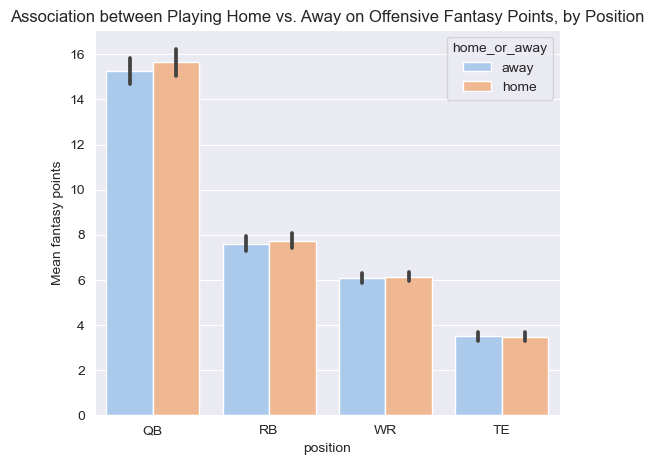

**Figure 1.2: Percentage of total games won by home/away teams**

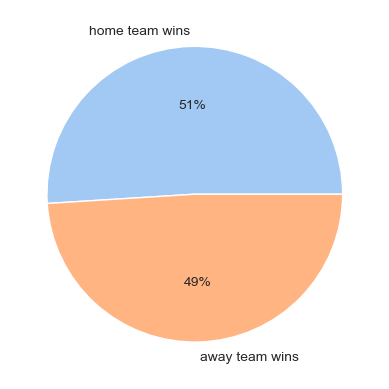

**Figure 1.3: Distribution of score differences between home and away teams**

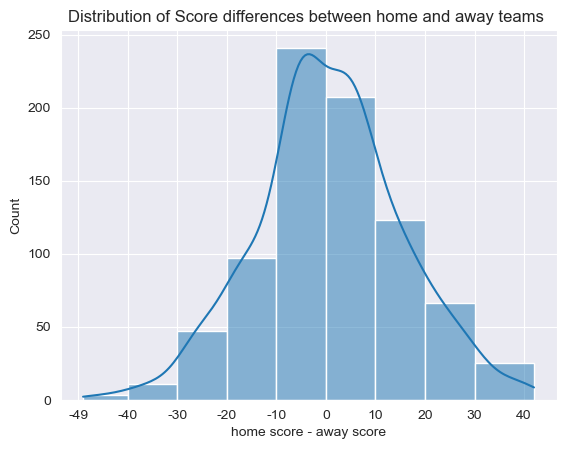

**Figure 1.4: Average extra net points from playing home, by team**

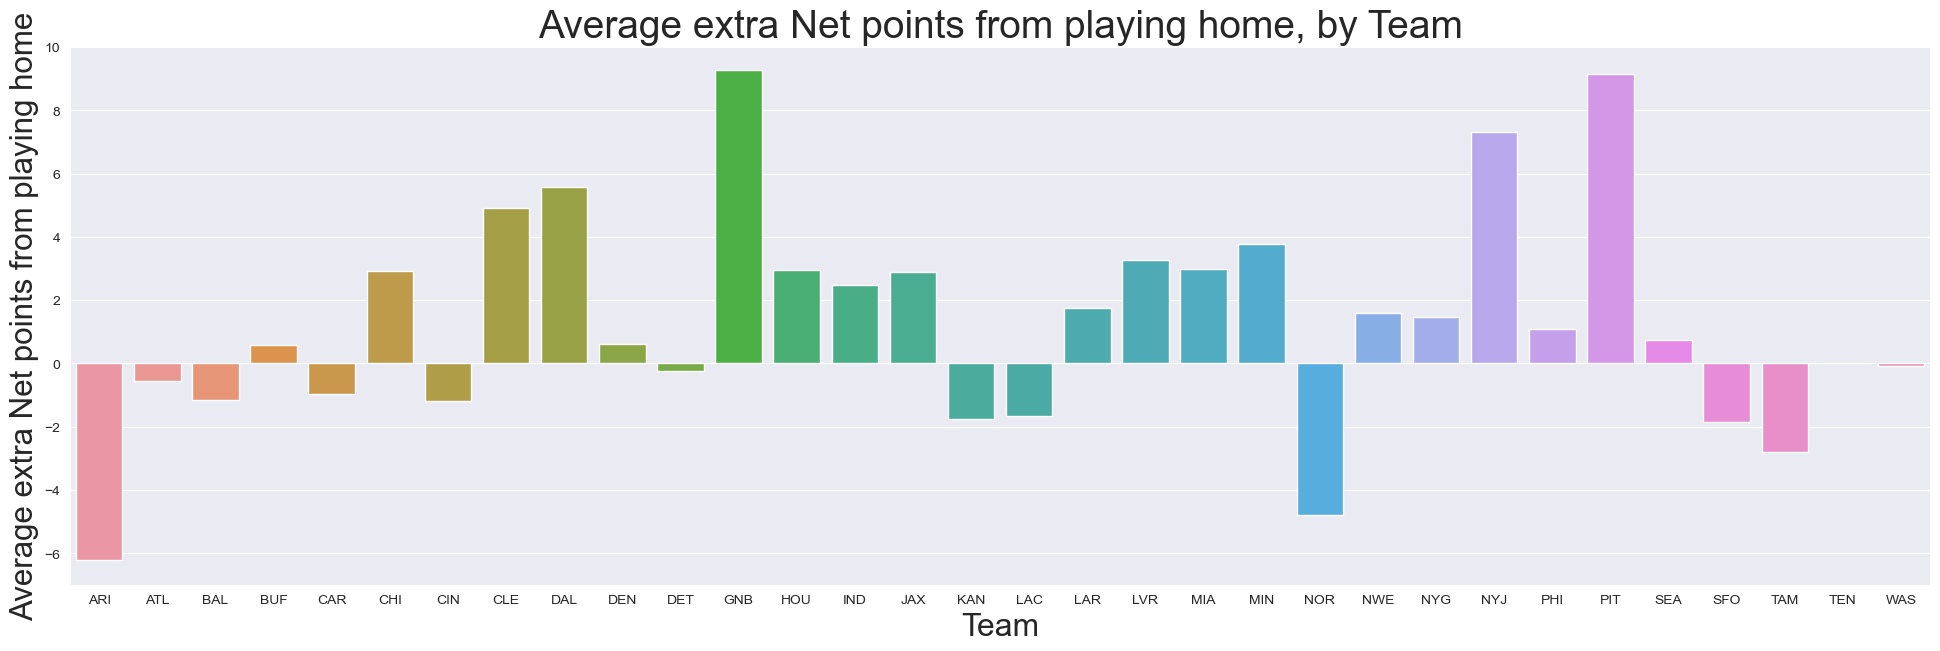

**Figure 1.5: Correlations between extra net points and the most positively and negatively correlated variables** 
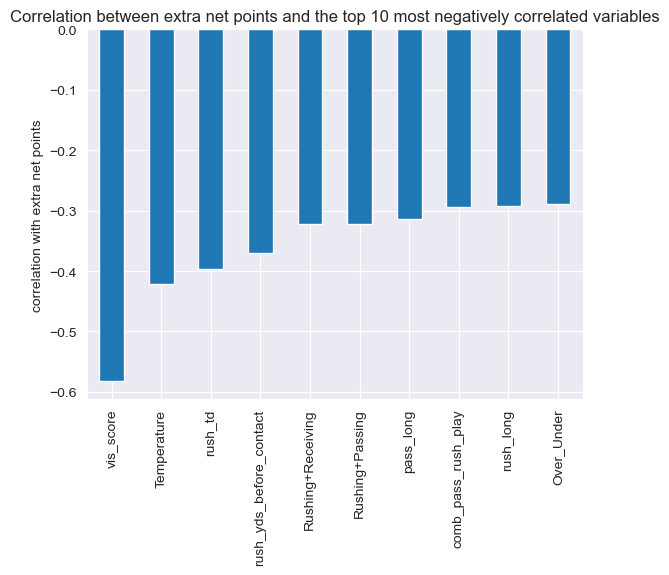
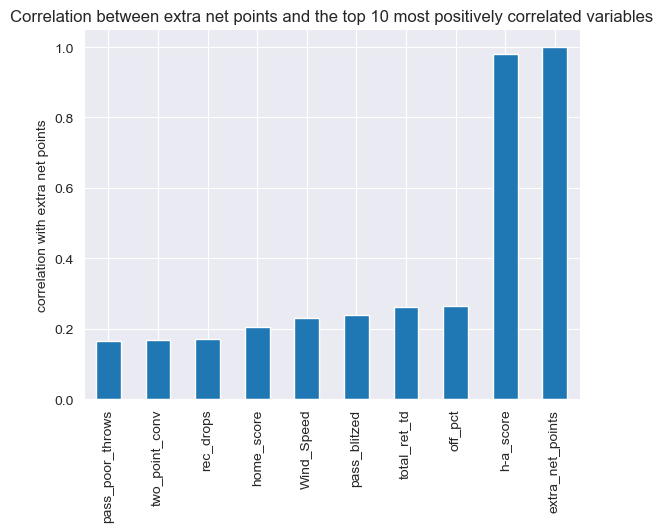

### Analysis 2 Appendix

#### Figure 2.1: Overall Offensive Performance vs. Weather Plots

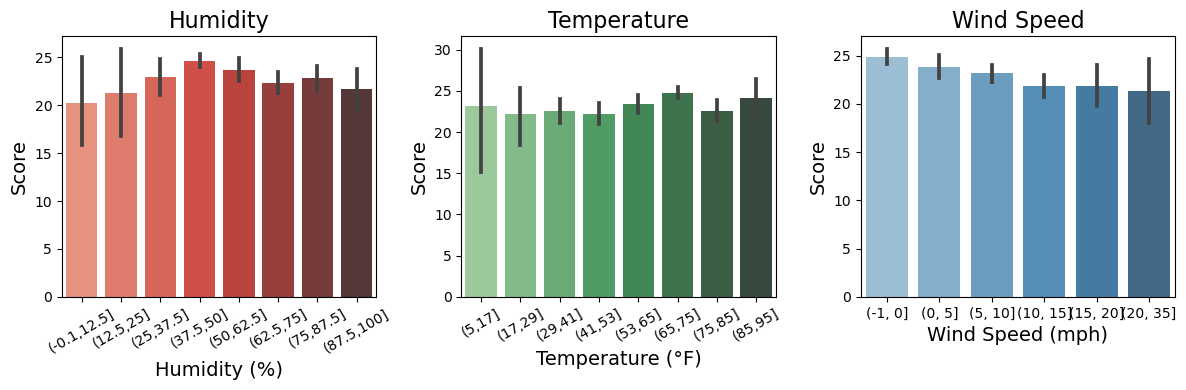

In [25]:
#|echo: false
# Overall Offensive Performance Plots

fig, axs = plt.subplots(1,3, figsize=(12, 4))
labels = ['(-0.1,12.5]','(12.5,25]','(25,37.5]','(37.5,50]','(50,62.5]','(62.5,75]','(75,87.5]','(87.5,100]']
labels1 = ['(5,17]','(17,29]','(29,41]','(41,53]','(53,65]','(65,75]','(75,85]','(85,95]']
# Plot for Humidity
pal_humidity = sns.color_palette("Reds_d", 8)
sns.barplot(x=binned_game_humidity[0], y=game_scores, palette=pal_humidity, ax=axs[0])
axs[0].set_xlabel(xlabel='Humidity (%)', fontsize=14)
axs[0].set_ylabel(ylabel='Score', fontsize=14)
axs[0].set_title('Humidity', fontsize=16)
axs[0].set_xticklabels(labels, rotation=30)

# Plot for Temperature
pal_temp = sns.color_palette("Greens_d", 8)
sns.barplot(x=binned_game_temp[0], y=game_scores, palette=pal_temp, ax=axs[1])
axs[1].set_xlabel(xlabel= 'Temperature (°F)', fontsize=14)
axs[1].set_ylabel(ylabel='Score', fontsize=14)
axs[1].set_title('Temperature', fontsize=16)
axs[1].set_xticklabels(labels1, rotation=30)

# Plot for Wind Speed
pal_wind_speed = sns.color_palette("Blues_d", 8)
sns.barplot(x=binned_game_wind_speed[0], y=game_scores, palette=pal_wind_speed, ax=axs[2])
axs[2].set_xlabel(xlabel='Wind Speed (mph)', fontsize=14)
axs[2].set_ylabel(ylabel='Score', fontsize=14)
axs[2].set_title('Wind Speed', fontsize=16)

plt.tight_layout()
plt.show()

#### Figure 2.2: Humidity Positional Plots

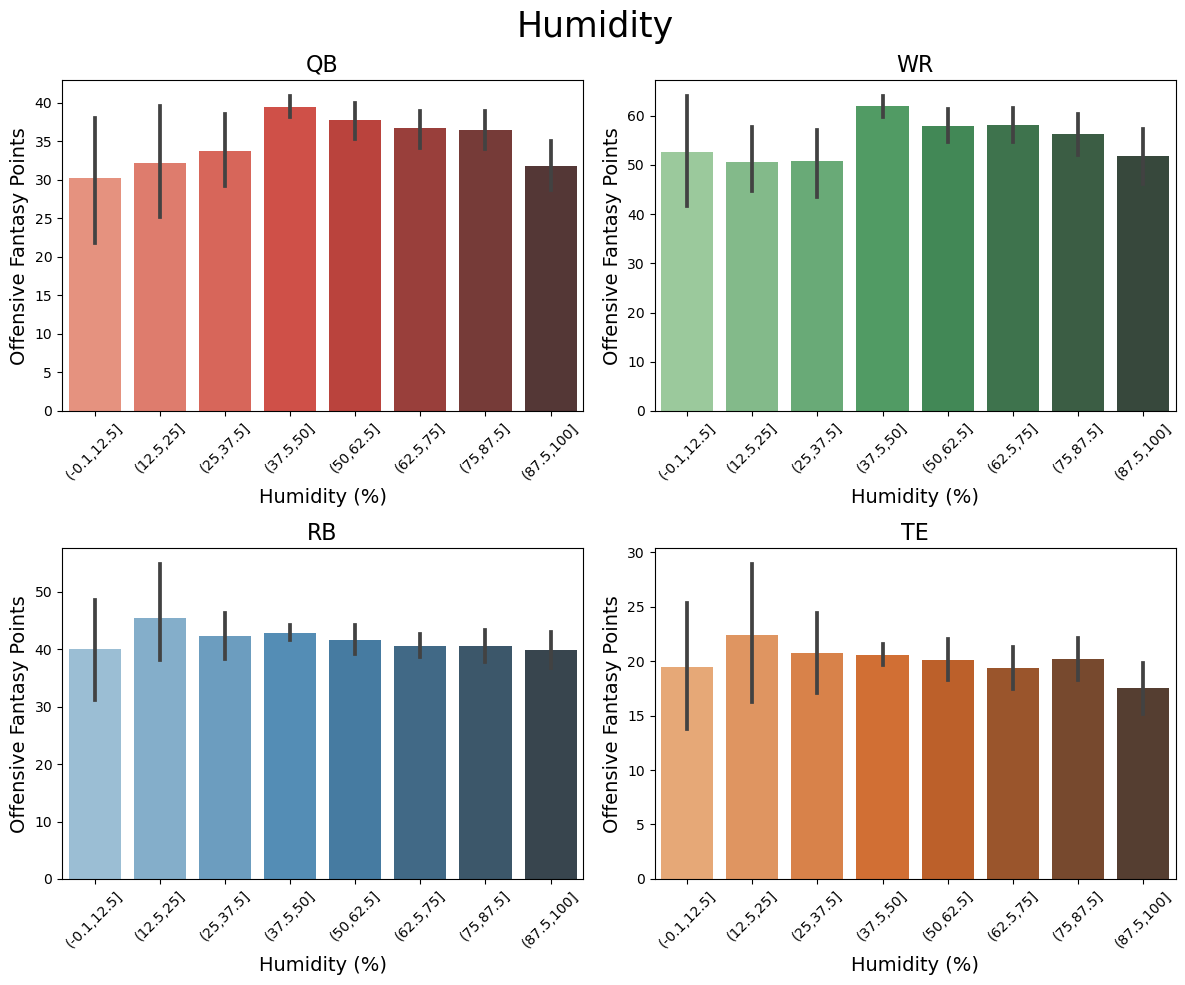

In [26]:
#|echo: false
# Humidity Positional Plots

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
labels = ['(-0.1,12.5]','(12.5,25]','(25,37.5]','(37.5,50]','(50,62.5]','(62.5,75]','(75,87.5]','(87.5,100]']
fig.suptitle('Humidity', fontsize=25)

# Plot for QB
pal_qb = sns.color_palette("Reds_d", 8)
sns.barplot(x=binned_game_humidity[0], y=qb_Off_SDP, palette=pal_qb, ax=axs[0, 0])
axs[0, 0].set_xlabel(xlabel='Humidity (%)', fontsize=14)
axs[0, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 0].set_title('QB', fontsize=16)
axs[0, 0].set_xticklabels(labels, rotation=45)

# Plot for WR
pal_wr = sns.color_palette("Greens_d", 8)
sns.barplot(x=binned_game_humidity[0], y=wr_Off_SDP, palette=pal_wr, ax=axs[0, 1])
axs[0, 1].set_xlabel(xlabel='Humidity (%)', fontsize=14)
axs[0, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 1].set_title('WR', fontsize=16)
axs[0, 1].set_xticklabels(labels, rotation=45)

# Plot for RB
pal_rb = sns.color_palette("Blues_d", 8)
sns.barplot(x=binned_game_humidity[0], y=rb_Off_SDP, palette=pal_rb, ax=axs[1, 0])
axs[1, 0].set_xlabel(xlabel='Humidity (%)', fontsize=14)
axs[1, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 0].set_title('RB', fontsize=16)
axs[1, 0].set_xticklabels(labels, rotation=45)

# Plot for TE
pal_te = sns.color_palette("Oranges_d", 8)
sns.barplot(x=binned_game_humidity[0], y=te_Off_SDP, palette=pal_te, ax=axs[1, 1])
axs[1, 1].set_xlabel(xlabel='Humidity (%)', fontsize=14)
axs[1, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 1].set_title('TE', fontsize=16)
axs[1, 1].set_xticklabels(labels, rotation=45)

plt.tight_layout()
plt.show()

#### Figure 2.3: Temperature Positional Plots

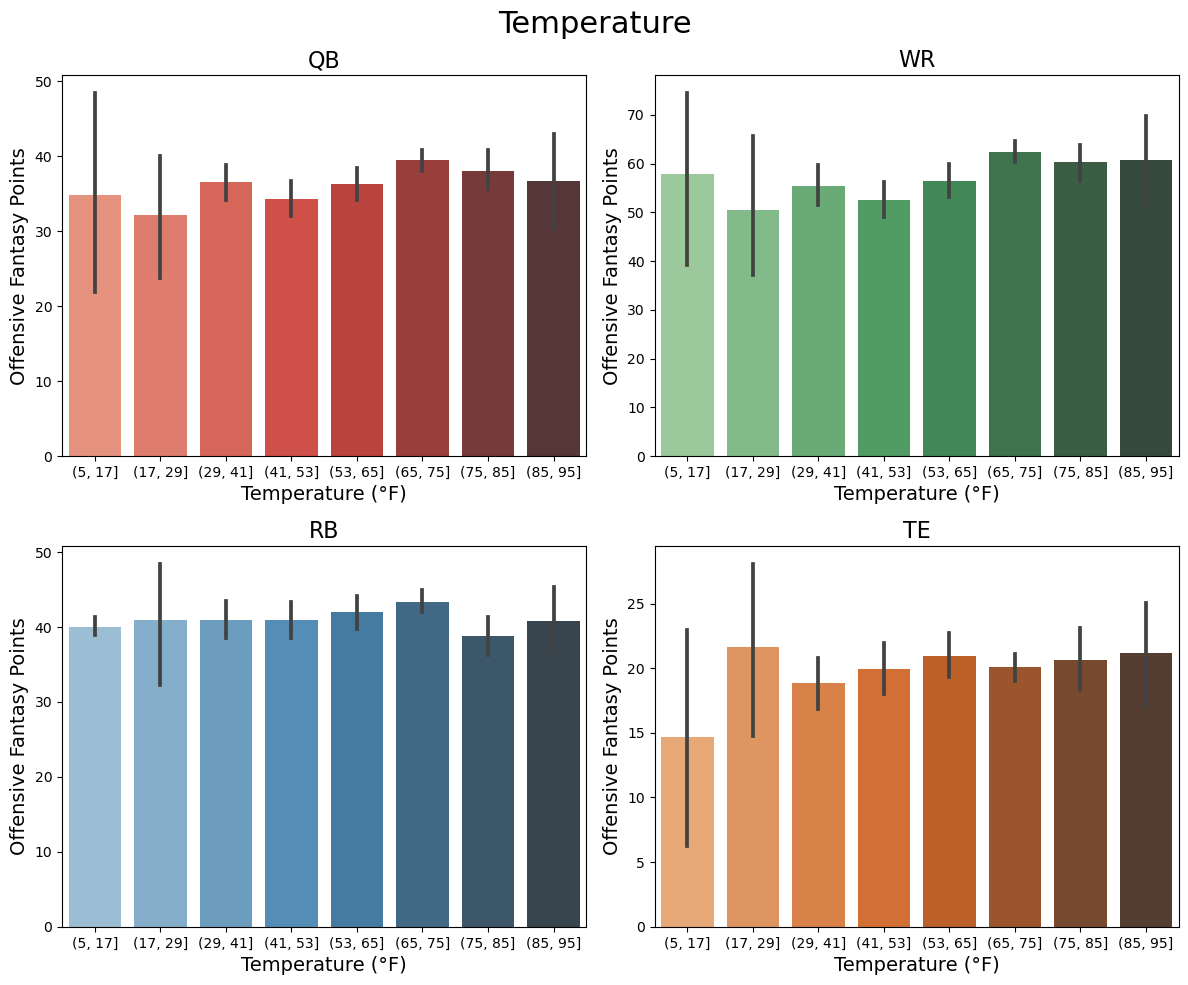

In [27]:
#|echo: false
# Temperature Positional Plots

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Temperature', fontsize=22)

# Plot for QB
pal_qb = sns.color_palette("Reds_d", 8)
sns.barplot(x=binned_game_temp[0], y=qb_Off_SDP, palette=pal_qb, ax=axs[0, 0])
axs[0, 0].set_xlabel(xlabel='Temperature (°F)', fontsize=14)
axs[0, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 0].set_title('QB', fontsize=16)

# Plot for WR
pal_wr = sns.color_palette("Greens_d", 8)
sns.barplot(x=binned_game_temp[0], y=wr_Off_SDP, palette=pal_wr, ax=axs[0, 1])
axs[0, 1].set_xlabel(xlabel='Temperature (°F)', fontsize=14)
axs[0, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 1].set_title('WR', fontsize=16)

# Plot for RB
pal_rb = sns.color_palette("Blues_d", 8)
sns.barplot(x=binned_game_temp[0], y=rb_Off_SDP, palette=pal_rb, ax=axs[1, 0])
axs[1, 0].set_xlabel(xlabel='Temperature (°F)', fontsize=14)
axs[1, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 0].set_title('RB', fontsize=16)

# Plot for TE
pal_te = sns.color_palette("Oranges_d", 8)
sns.barplot(x=binned_game_temp[0], y=te_Off_SDP, palette=pal_te, ax=axs[1, 1])
axs[1, 1].set_xlabel(xlabel='Temperature (°F)', fontsize=14)
axs[1, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 1].set_title('TE', fontsize=16)

plt.tight_layout()
plt.show()

#### Figure 2.4: Wind Speed Positional Plots

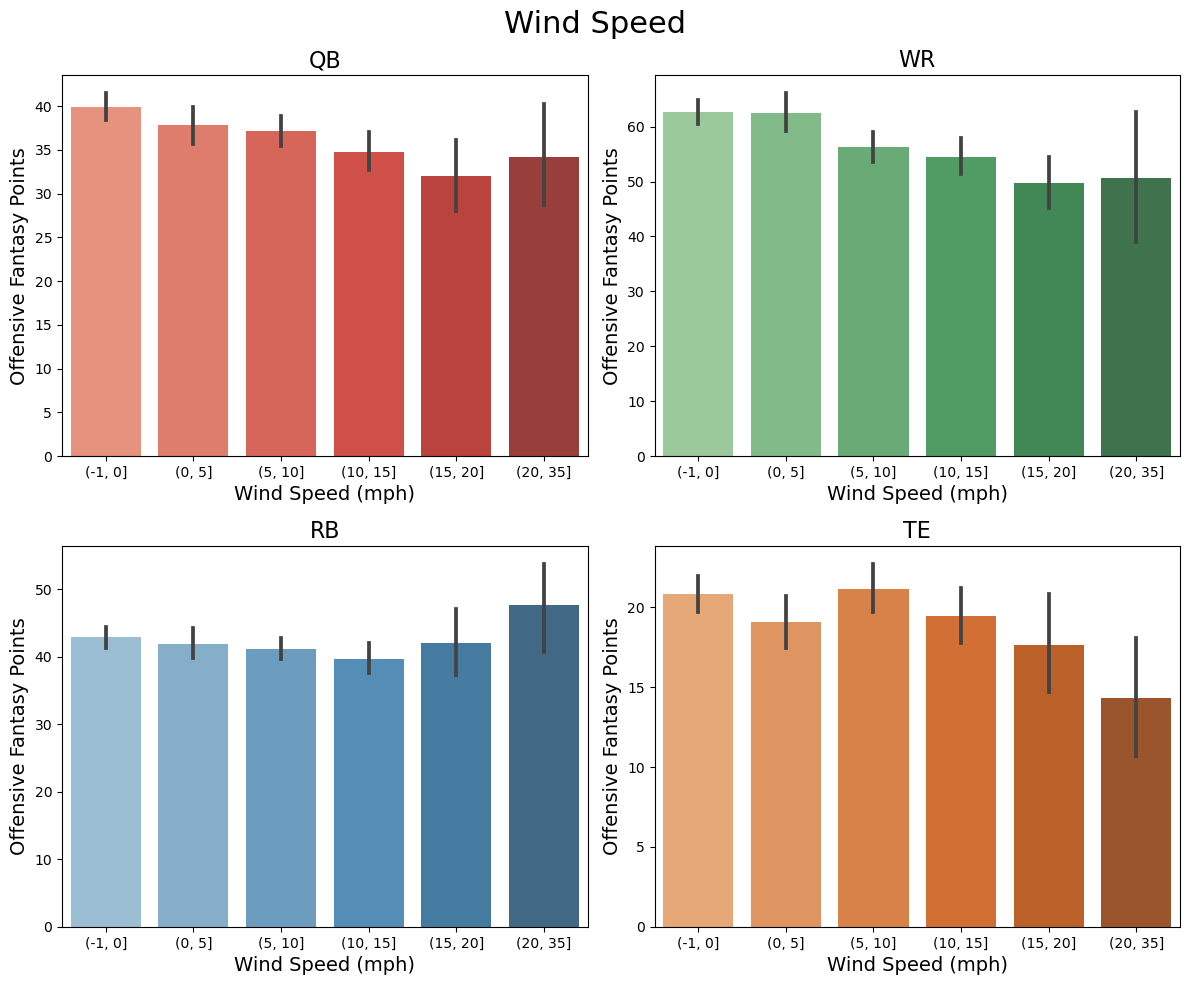

In [28]:
#|echo: false
# Wind Speed Positional Plots

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Wind Speed', fontsize=22)

# Plot for QB
pal_qb = sns.color_palette("Reds_d", 8)
sns.barplot(x=binned_game_wind_speed[0], y=qb_Off_SDP, palette=pal_qb, ax=axs[0, 0])
axs[0, 0].set_xlabel(xlabel='Wind Speed (mph)', fontsize=14)
axs[0, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 0].set_title('QB', fontsize=16)

# Plot for WR
pal_wr = sns.color_palette("Greens_d", 8)
sns.barplot(x=binned_game_wind_speed[0], y=wr_Off_SDP, palette=pal_wr, ax=axs[0, 1])
axs[0, 1].set_xlabel(xlabel='Wind Speed (mph)', fontsize=14)
axs[0, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[0, 1].set_title('WR', fontsize=16)

# Plot for RB
pal_rb = sns.color_palette("Blues_d", 8)
sns.barplot(x=binned_game_wind_speed[0], y=rb_Off_SDP, palette=pal_rb, ax=axs[1, 0])
axs[1, 0].set_xlabel(xlabel='Wind Speed (mph)', fontsize=14)
axs[1, 0].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 0].set_title('RB', fontsize=16)

# Plot for TE
pal_te = sns.color_palette("Oranges_d", 8)
sns.barplot(x=binned_game_wind_speed[0], y=te_Off_SDP, palette=pal_te, ax=axs[1, 1])
axs[1, 1].set_xlabel(xlabel='Wind Speed (mph)', fontsize=14)
axs[1, 1].set_ylabel(ylabel='Offensive Fantasy Points', fontsize=14)
axs[1, 1].set_title('TE', fontsize=16)

plt.tight_layout()
plt.show()

### Analysis 3 Appendix

#### Figure 3.1: Barplot Of Total Yards Per Game Across All Position By Surface

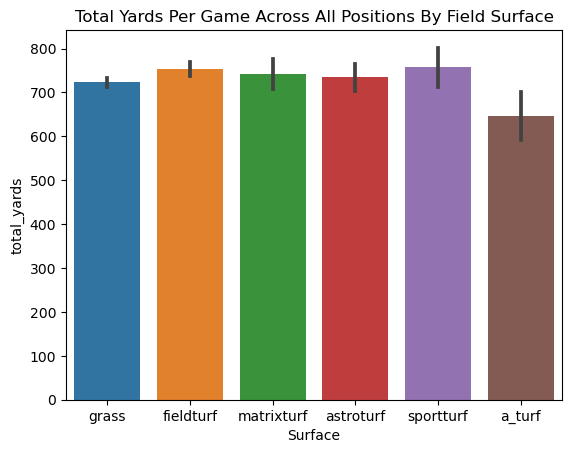

In [29]:
#|echo: false
#creates a list of the unqiue game_ids, which represent each game in the dataset
allGames=data.game_id.value_counts().index
#converts the list into a series
allGames=pd.Series(allGames)
#makes a series containing the surface of the game with the corresponding index in allGames
surfaces=allGames.apply(lambda x: data.loc[data.game_id==x].Surface.mode())
#concatenates the surfaces and allGames series to create a dataframe
gamesSurface=pd.concat([surfaces,allGames], axis=1)
#makes a series containing the total yards of the game with the corresponding index in allGames
totalYards=allGames.apply(lambda x: data.loc[data.game_id==x]['Rushing+Passing'].sum())
#creates a dataframe containing the surface and total yards for each game, and renames the columns to match what each column stores
allYardsDF=pd.concat([gamesSurface,totalYards], axis=1)
allYardsDF.columns = ['Surface', 'game_id', 'total_yards']
#use seaborn to create a barplot to show the comparison of means of total yards per game across surfaces
sns.barplot(y=allYardsDF.total_yards, x=allYardsDF.Surface)
#adding the title
plt.title('Total Yards Per Game Across All Positions By Field Surface');

#### Figure 3.2: Density Plot Of Total Yards Per Game Across All Position By Surface

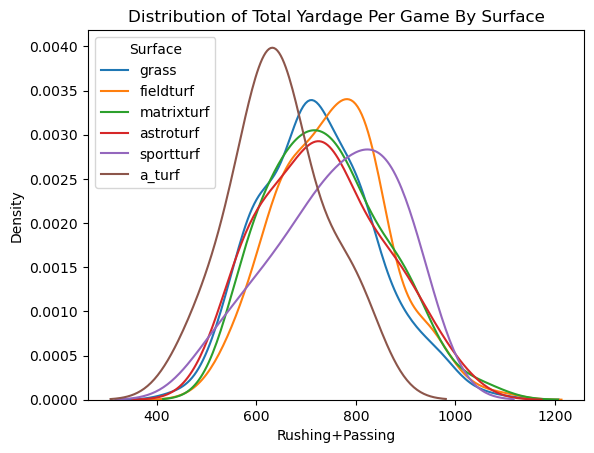

In [30]:

#|echo: false
#subset the data by each surface and then groupby the game ID to be able to sum the yards for each game
totalGrassYards=data.loc[data.Surface=='grass'].groupby('game_id')['Rushing+Passing'].sum()
totalFturfYards=data.loc[data.Surface=='fieldturf'].groupby('game_id')['Rushing+Passing'].sum()
totalASturfYards=data.loc[data.Surface=='astroturf'].groupby('game_id')['Rushing+Passing'].sum()
totalMturfYards=data.loc[data.Surface=='matrixturf'].groupby('game_id')['Rushing+Passing'].sum()
totalSturfYards=data.loc[data.Surface=='sportturf'].groupby('game_id')['Rushing+Passing'].sum()
totalAturfYards=data.loc[data.Surface=='a_turf'].groupby('game_id')['Rushing+Passing'].sum()
#each of these is an object that stores the total yards for each game_id
#use kdeplot to plot the density distribution of the yardage for each surface
sns.kdeplot(x=totalGrassYards)
sns.kdeplot(x=totalFturfYards)
sns.kdeplot(x=totalMturfYards)
sns.kdeplot(x=totalASturfYards)
sns.kdeplot(x=totalSturfYards)
sns.kdeplot(x=totalAturfYards)
plt.legend(title='Surface', loc='upper left', labels=['grass', 'fieldturf', 'matrixturf', 'astroturf', 'sportturf', 'a_turf']);
plt.title('Distribution of Total Yardage Per Game By Surface');

#### Figure 3.3: Barplot Of Quarterback Yards Per Game By Surface

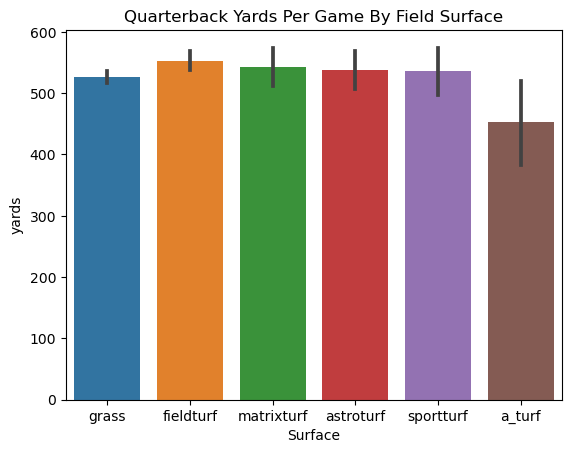

In [49]:
#|echo: false
#made a subset of the data only containing quarterbacks
quarterBacks=data[data.position=='QB']
#makes a series containing the total quarterback yards of the game with the corresponding index in allGames
totalYardsQB=allGames.apply(lambda x: quarterBacks.loc[quarterBacks.game_id==x]['Rushing+Passing'].sum())
#creates a new dataframe storing the surface and total qb yards for each game
qbDF=pd.concat([gamesSurface, totalYardsQB], axis=1)
#renames the columns top match the content in each column
qbDF.columns = ['Surface', 'game_id', 'yards']
#use seaborn to create a barplot to show the comparison of means of total yards per game across surfaces
sns.barplot(x=qbDF.Surface, y=qbDF.yards)
#adding the title
plt.title('Quarterback Yards Per Game By Field Surface');

#### Figure 3.4: Density Plot Of Quarterback Yards Per Game By Surface

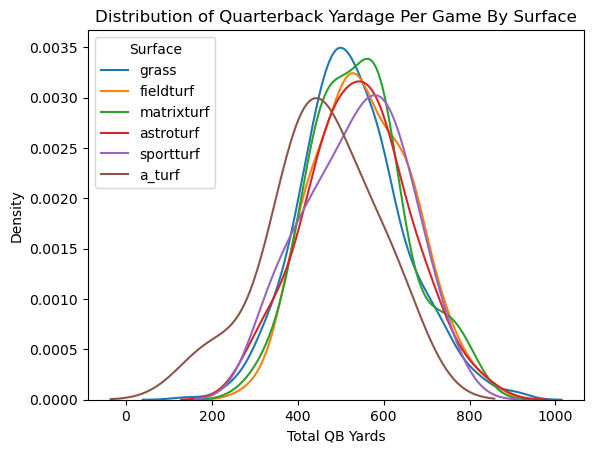

In [48]:
#|echo: false
#subset the quarterback dataframe by each surface and then groupby the game ID to be able to sum the yards for each game
qbGrassYards=quarterBacks.loc[quarterBacks.Surface=='grass'].groupby('game_id')['Rushing+Passing'].sum()
qbFturfYards=quarterBacks.loc[quarterBacks.Surface=='fieldturf'].groupby('game_id')['Rushing+Passing'].sum()
qbASturfYards=quarterBacks.loc[quarterBacks.Surface=='astroturf'].groupby('game_id')['Rushing+Passing'].sum()
qbMturfYards=quarterBacks.loc[quarterBacks.Surface=='matrixturf'].groupby('game_id')['Rushing+Passing'].sum()
qbSturfYards=quarterBacks.loc[quarterBacks.Surface=='sportturf'].groupby('game_id')['Rushing+Passing'].sum()
qbAturfYards=quarterBacks.loc[quarterBacks.Surface=='a_turf'].groupby('game_id')['Rushing+Passing'].sum()
#each of these is an object that stores the total quarterback yards for each game_id
#use kdeplot to plot the density distribution of the yardage for each surface
sns.kdeplot(x=qbGrassYards)
sns.kdeplot(x=qbFturfYards)
sns.kdeplot(x=qbMturfYards)
sns.kdeplot(x=qbASturfYards)
sns.kdeplot(x=qbSturfYards)
sns.kdeplot(x=qbAturfYards)
plt.legend(title='Surface', loc='upper left', labels=['grass', 'fieldturf', 'matrixturf', 'astroturf', 'sportturf', 'a_turf']);
plt.title('Distribution of Quarterback Yardage Per Game By Surface');
plt.xlabel('Total QB Yards');

#### Figure 3.5: Barplot Of Runningback Yards Per Game By Surface

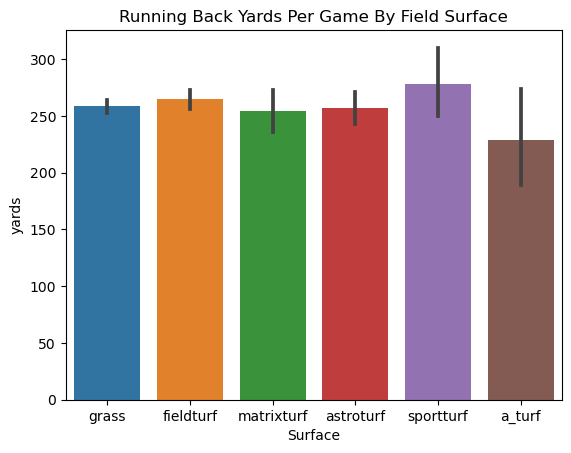

In [47]:
#|echo: false
#made a subset of the data only containing runningbacks
runningBacks=data.loc[data.position.isin(['RB', 'HB'])].copy()

#added a column that stores the sum of the rushing and receiving yards for each running back
runningBacks=runningBacks.rename(columns={'Rushing+Receiving':'Total RB Yards'})
#makes a series containing the total runningback yards of the game with the corresponding index in allGames
totalYardsRB=allGames.apply(lambda x: runningBacks.loc[runningBacks.game_id==x]['Total RB Yards'].sum())
#creates a new dataframe storing the surface and total running back yards for each game
rbDF=pd.concat([gamesSurface, totalYardsRB], axis=1)
#renames the columns top match the content in each column
rbDF.columns = ['Surface', 'game_id', 'yards']
#use seaborn to create a barplot to show the comparison of means of total runningback yards per game across surfaces
sns.barplot(x=rbDF.Surface, y=rbDF.yards)
plt.title('Running Back Yards Per Game By Field Surface');

#### Figure 3.6: Density Plot Of Runningback Yards Per Game By Surface

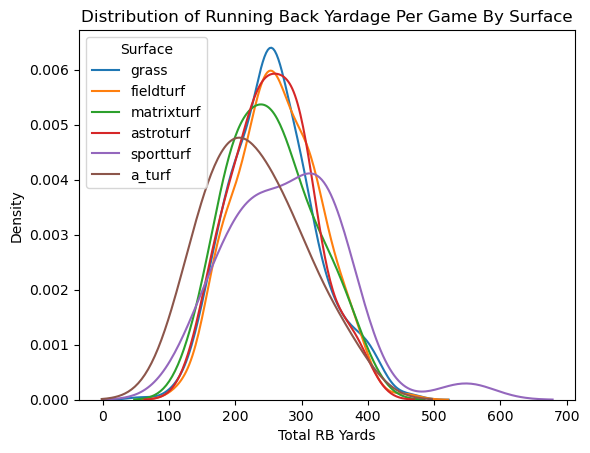

In [46]:
#|echo: false
#subset the runningback dataframe by each surface and then groupby the game ID to be able to sum the yards for each game
rbGrassYards=runningBacks.loc[runningBacks.Surface=='grass'].groupby('game_id')['Total RB Yards'].sum()
rbFturfYards=runningBacks.loc[runningBacks.Surface=='fieldturf'].groupby('game_id')['Total RB Yards'].sum()
rbASturfYards=runningBacks.loc[runningBacks.Surface=='astroturf'].groupby('game_id')['Total RB Yards'].sum()
rbMturfYards=runningBacks.loc[runningBacks.Surface=='matrixturf'].groupby('game_id')['Total RB Yards'].sum()
rbSturfYards=runningBacks.loc[runningBacks.Surface=='sportturf'].groupby('game_id')['Total RB Yards'].sum()
rbAturfYards=runningBacks.loc[runningBacks.Surface=='a_turf'].groupby('game_id')['Total RB Yards'].sum()
#each of these is an object that stores the total runningback yards for each game_id
#use kdeplot to plot the density distribution of the yardage for each surface
sns.kdeplot(x=rbGrassYards)
sns.kdeplot(x=rbFturfYards)
sns.kdeplot(x=rbMturfYards)
sns.kdeplot(x=rbASturfYards)
sns.kdeplot(x=rbSturfYards)
sns.kdeplot(x=rbAturfYards)
plt.legend(title='Surface', loc='upper left', labels=['grass', 'fieldturf', 'matrixturf', 'astroturf', 'sportturf', 'a_turf']);
plt.title('Distribution of Running Back Yardage Per Game By Surface');


#### Figure 3.7: Barplot Of Wide Receiver/Tight Ends Yards Per Game By Surface

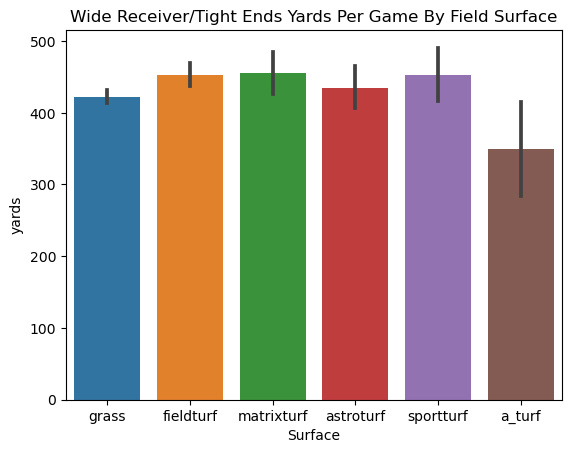

In [45]:
#|echo: false
#made a subset of the data only containing wide receivers and tight ends
wrte=data.loc[data.position.isin(['WR', 'TE'])].copy()

#added a column that stores the sum of the rushing and receiving yards for each receiver and tight end
wrte=wrte.rename(columns={'Rushing+Receiving':'Total WR/TE Yards'})
#makes a series containing the total wide receiver and tight end yards of the game with the corresponding index in allGames
totalYardsWRTE=allGames.apply(lambda x: wrte.loc[wrte.game_id==x]['Total WR/TE Yards'].sum())
#creates a new dataframe storing the surface and total wide receiver and tight end yards for each game
wrteDF=pd.concat([gamesSurface, totalYardsWRTE], axis=1)
#renames the columns top match the content in each column
wrteDF.columns = ['Surface', 'game_id', 'yards']
#use seaborn to create a barplot to show the comparison of means of total wide receiver and tight end yards per game across surfaces
sns.barplot(x=wrteDF.Surface, y=wrteDF.yards)
plt.title('Wide Receiver/Tight Ends Yards Per Game By Field Surface');

#### Figure 3.8: : Density Plot Of Wide Receiver/Tight Ends Yards Per Game By Surface

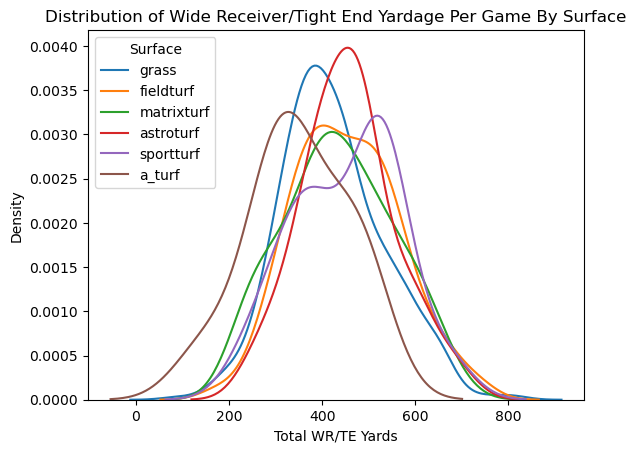

In [44]:
#|echo: false
#subset the receiver and tight end dataframe by each surface and then groupby the game ID to be able to sum the yards for each game
wrteGrassYards=wrte.loc[wrte.Surface=='grass'].groupby('game_id')['Total WR/TE Yards'].sum()
wrteFturfYards=wrte.loc[wrte.Surface=='fieldturf'].groupby('game_id')['Total WR/TE Yards'].sum()
wrteMturfYards=wrte.loc[wrte.Surface=='matrixturf'].groupby('game_id')['Total WR/TE Yards'].sum()
wrteASturfYards=wrte.loc[wrte.Surface=='astroturf'].groupby('game_id')['Total WR/TE Yards'].sum()
wrteSturfYards=wrte.loc[wrte.Surface=='sportturf'].groupby('game_id')['Total WR/TE Yards'].sum()
wrteAturfYards=wrte.loc[wrte.Surface=='a_turf'].groupby('game_id')['Total WR/TE Yards'].sum()
#each of these is an object that stores the total wide receiver and tight end yards for each game_id
#use kdeplot to plot the density distribution of the yardage for each surface
sns.kdeplot(x=wrteGrassYards)
sns.kdeplot(x=wrteFturfYards)
sns.kdeplot(x=wrteASturfYards)
sns.kdeplot(x=wrteMturfYards)
sns.kdeplot(x=wrteSturfYards)
sns.kdeplot(x=wrteAturfYards)
plt.legend(title='Surface', loc='upper left', labels=['grass', 'fieldturf', 'matrixturf', 'astroturf', 'sportturf', 'a_turf']);
plt.title('Distribution of Wide Receiver/Tight End Yardage Per Game By Surface');

### Analysis 4 Appendix

#### Figure 4.1: Demographics of Teams That Win

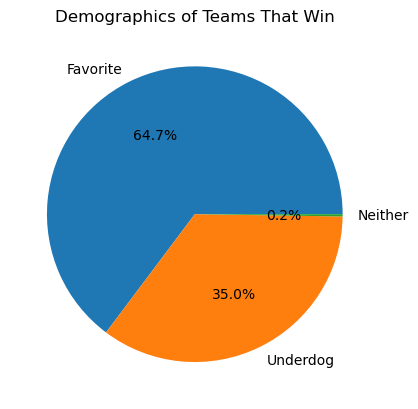

In [37]:
#|echo: false
winner_data = data[data.win=='win'].groupby(['game_id','team']).first() #Subsetting and grouping the data to the teams that won
plt.pie(winner_data.favorite.value_counts()/winner_data.favorite.value_counts().sum(),labels=['Favorite','Underdog','Neither'],autopct='%1.1f%%');
plt.title('Demographics of Teams That Win');

#### Figure 4.2: Demographics of Teams That Cover

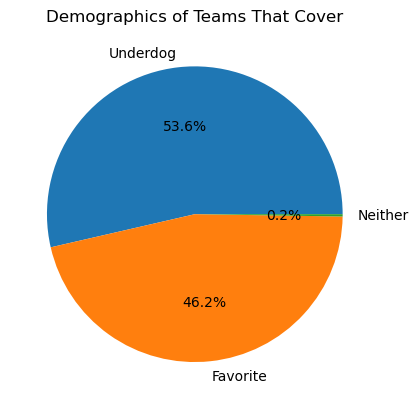

In [38]:
#|echo: false
covered_data = data[data.covered=='yes'].groupby(['game_id','team']).first() #Subsetting and grouping the data to the teams that covered
plt.pie(covered_data.favorite.value_counts()/covered_data.favorite.value_counts().sum(),labels=['Underdog','Favorite','Neither'],autopct='%1.1f%%');
plt.title('Demographics of Teams That Cover');

#### Figure 4.3: Underdog Vegas Line vs Score Differential

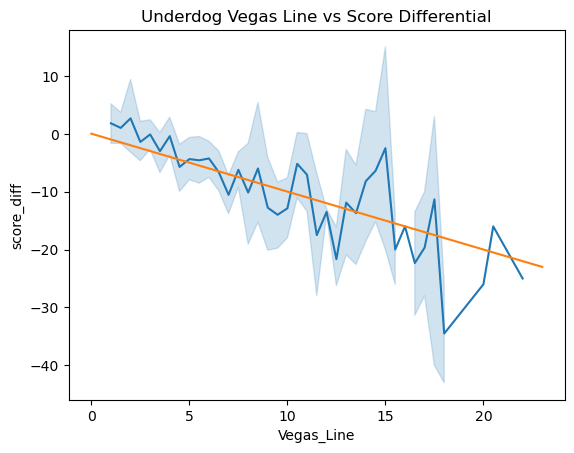

In [43]:
#|echo: false
import numpy as np
underdog_data=data[data.favorite=='no'].groupby(['game_id','team']).first()
sns.lineplot(data=underdog_data,x='Vegas_Line',y='score_diff');
x = np.linspace(0, 23, 100);
plt.plot(x,-x);
plt.title('Underdog Vegas Line vs Score Differential');

#### Figure 4.4: Underdog Teams Covering vs Vegas Line

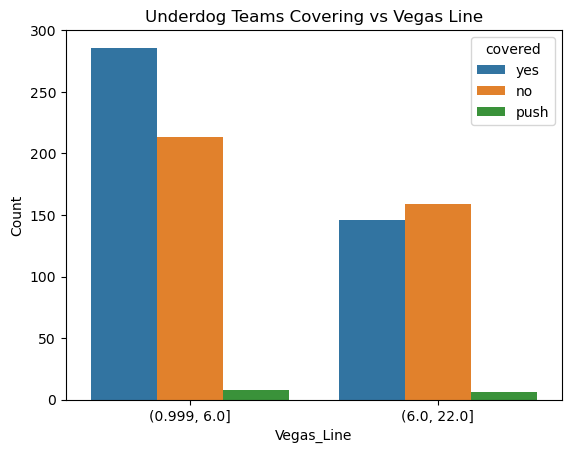

In [41]:
#|echo: false
binned_underdog_data = pd.cut(underdog_data.Vegas_Line,[.999,6,22],retbins=True)
underdog_data['Binned_Vegas_Line'] = binned_underdog_data[0]
sns.countplot(data=underdog_data,x='Binned_Vegas_Line',hue='covered');
plt.xlabel('Vegas_Line');
plt.ylabel('Count');
plt.title('Underdog Teams Covering vs Vegas Line');

#### Figure 4.5: 1 to 6 Point Underdogs That Cover

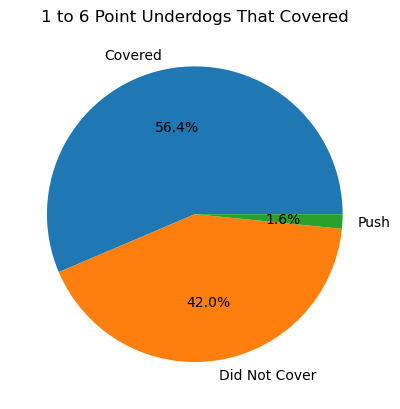

In [42]:
#|echo: false
one_to_six_underdog_data = underdog_data[underdog_data.Binned_Vegas_Line==binned_underdog_data[0].value_counts().index[0]]
plt.pie(one_to_six_underdog_data.covered.value_counts()/one_to_six_underdog_data.covered.value_counts().sum(),labels=['Covered','Did Not Cover','Push'],autopct='%1.1f%%');
plt.title('1 to 6 Point Underdogs That Covered');